In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
file = 'C:/Users/yanni/Documents/GitHub/CodingDojo/ExcelData/mortgages.csv'
df = pd.read_csv(file)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [166]:
FivePercent = df.loc[(df['Mortgage Name'] == '30 Year') & (df['Interest Rate'] == 0.05)]
ThreePercent = df.loc[(df['Mortgage Name'] == '30 Year') & (df['Interest Rate'] == 0.03)]
ThreePercent

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


In [167]:
data = pd.DataFrame(data = {'Month': FivePercent['Month'].reset_index(drop = True), 'Cumulative Interest At Five Percent' : FivePercent['Interest Paid'].cumsum().reset_index(drop = True), 'Cumulative Interest At Three Percent' : ThreePercent['Interest Paid'].cumsum().reset_index(drop = True)}) 
# Essentially here, we are taking the two data series we've defined above in Line 80, and creating a brand new dataframe with ONLY the data we want.
# We are defining a name, and then the thing we want to be defined, plus some modifiers. .reset_index() is telling the dataframe that we want this to start
# at the 0 index, all the time. This is great for smushing data together. .cumsum() is the cumulative sum, which allows us to add up our defined index over each
# row of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 360 non-null    int64  
 1   Cumulative Interest At Five Percent   360 non-null    float64
 2   Cumulative Interest At Three Percent  360 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.6 KB


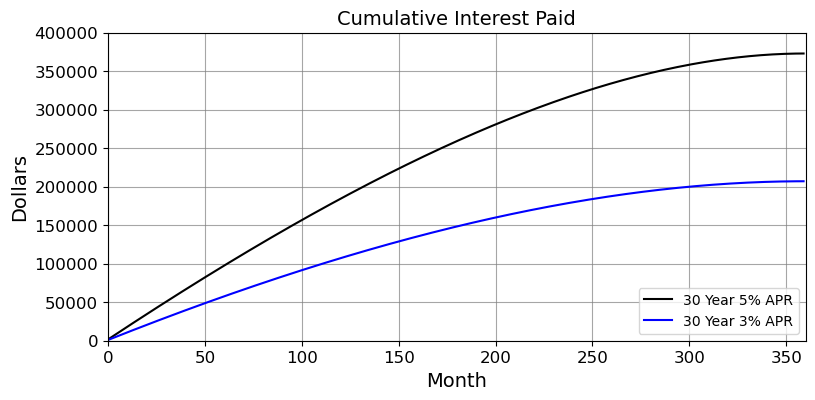

In [170]:
plt.style.use('default')
cIFive = data['Cumulative Interest At Five Percent'].values
cIThree = data['Cumulative Interest At Three Percent'].values
# data.plot(x = 'Month', y = ['Cumulative Interest At Five Percent', 'Cumulative Interest At Three Percent']) # This seems a little more detailed than the graph we were asked to recreate but hey, progress!
plt.figure(figsize=(9,4))
plt.plot(cIFive, c='black', label='30 Year 5% APR')
plt.plot(cIThree, c='blue', label='30 Year 3% APR')
plt.xlim(left=0, right=360)
plt.ylim(bottom=0, top=400000)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Dollars', fontsize=14)
plt.title('Cumulative Interest Paid', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(c='gray', alpha=.7, linestyle='-')
plt.legend(loc='lower right')